# Project: Communicate Data Findings (2017-fordgobike-tripdata)
## by Sidhi Agarwal

## Investigation Overview

> The overall goal is to show some analysis that has been done with this bike share data. We will try to detect several patterns in the data to have a better understading of how the users behave, when do they use the service, which factors have influence in the frequency of usage and how these factors interact with each other.

## Dataset Overview

> ### Each trip is anonymized and includes:

> - Trip Duration (seconds)
> - Start Time and Date
> - End Time and Date
> - Start Station ID
> - Start Station Name
> - Start Station Latitude
> - Start Station Longitude
> - End Station ID
> - End Station Name
> - End Station Latitude
> - End Station Longitude
> - Bike ID
> - User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
###### There are 155686 records and 13 columns

In [6]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statistics 
from scipy import stats

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
# Data cleaning

# make copy of data
df_clean = df.copy()

df_clean.dropna(inplace=True)

# convert datatype of start_time and end_time from object to datatime
df_clean['start_time']=pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

#  convert datatype of start_station_id and end_station_id to int
df_clean['start_station_id'] = df_clean['start_station_id'].astype('int')
df_clean['end_station_id'] = df_clean['end_station_id'].astype('int')

# convert datatype of user_type to category
df_clean['user_type'] = df_clean['user_type'].astype('category')



# Extract minute,day,week,month from the start_time
df_clean['duration_min'] = df_clean['duration_sec']/60

df_clean['start_date'] = df_clean.start_time.dt.strftime('%Y-%m-%d')
df_clean['start_hour_of_day'] = df_clean.start_time.dt.strftime('%H')
df_clean['start_day_of_week'] = df_clean.start_time.dt.strftime('%A')
df_clean['start_month'] = df_clean.start_time.dt.strftime('%B')

# save the cleaned data to csv file
df_clean.to_csv('fordgobike-tripdata_clean.csv',index=None)

main=pd.read_csv('fordgobike-tripdata_clean.csv')
main.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,duration_min,start_date,start_hour_of_day,start_day_of_week,start_month
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96.0,Customer,1335.166667,2017-12-31,16,Sunday,December
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88.0,Customer,1313.333333,2017-12-31,15,Sunday,December
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094.0,Customer,762.800000,2017-12-31,22,Sunday,December
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831.0,Customer,1036.200000,2017-12-31,17,Sunday,December
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167.0,Subscriber,726.716667,2017-12-31,14,Sunday,December


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Univariate Exploration of Trip Duration

> Since most of the values seemed to lie below 4000, I removed the outliers. For this, I computed the Z score of each duration value and remove it if was below 3. That is, remove all values beyond two standard deviations.

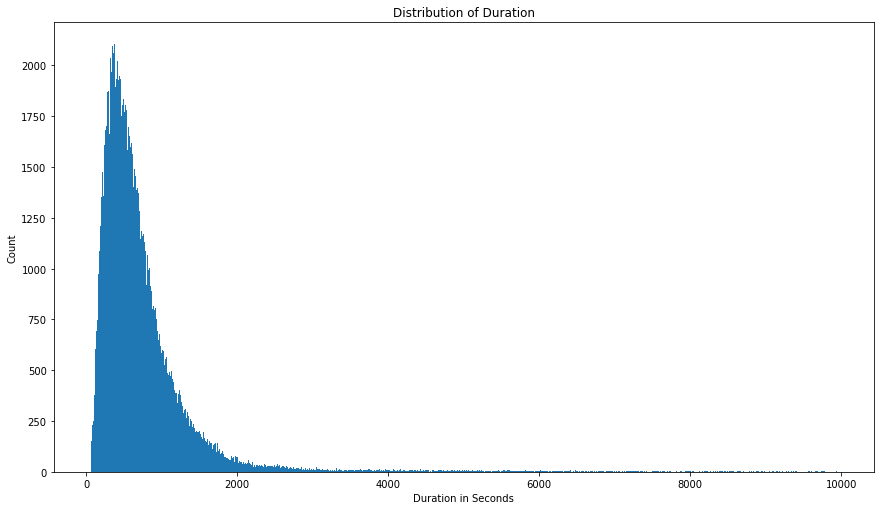

In [7]:
# Removing the outliers
main = main[(np.abs(stats.zscore(main.duration_sec)) < 3)]

# Visualization
graph = main.duration_sec
plt.figure(figsize=[14.70, 8.27])
plt.hist(graph,bins=1000);
plt.title("Distribution of Duration")
plt.xlabel('Duration in Seconds')
plt.ylabel('Count');

## The effect of User Type on Trip Duration

> This visualization represents the relationship between User Type and Trip Duration, indicating that regular users take lesser time to complete rides.

In [9]:
# Setting the base color
base_color = sb.color_palette()[0]

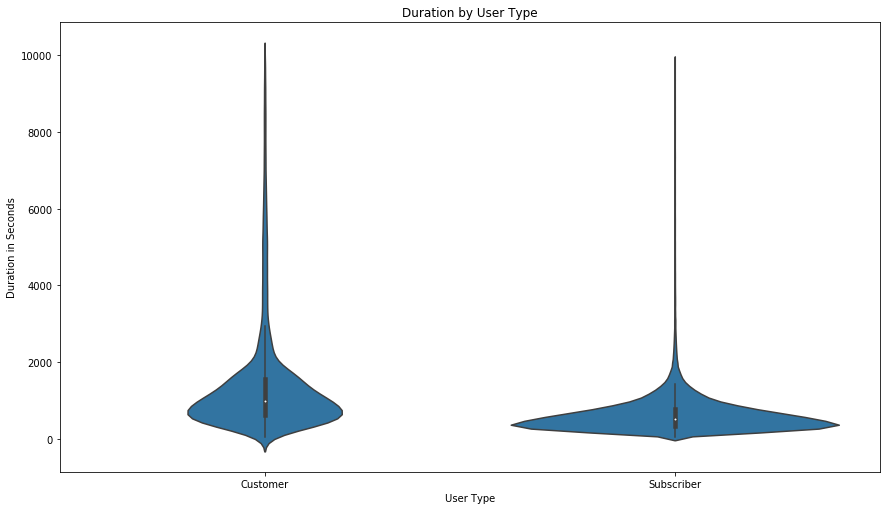

In [11]:
# User Type and Duration
plt.figure(figsize=[14.70, 8.27])
sb.violinplot(data=main,x='user_type',y='duration_sec', color=base_color);
plt.title("Duration by User Type")
plt.xlabel('User Type')
plt.ylabel('Duration in Seconds');

## How does the hourly usage vary during a week for customers and subscribers?
> It is interesting, that customers tend to use the bike service mostly on Sunday from 12 PM to 4 PM, while subscribers will likely have a trip from Monday to Friday during rush hours (7-9 AM, 4 PM - 6 PM).


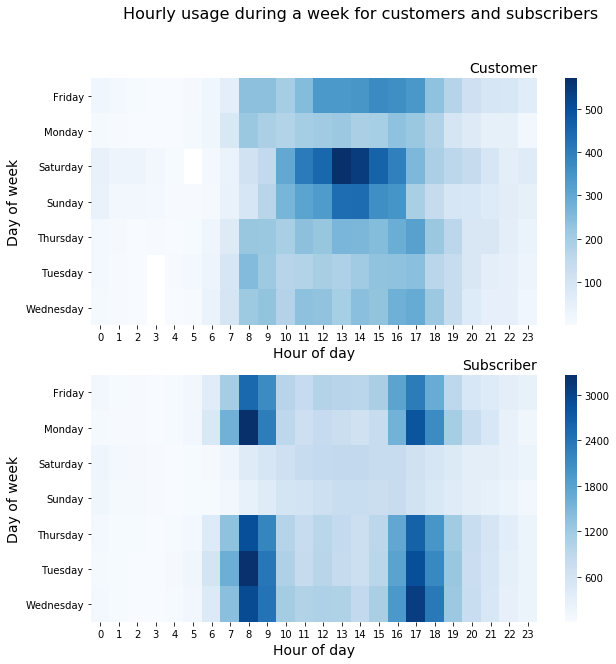

In [13]:
# Visualization
plt.figure(figsize=[10, 10]);
plt.suptitle('Hourly usage during a week for customers and subscribers', fontsize=16)

plt.subplot(2, 1, 1)
customers = main.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(ct_counts, cmap="Blues");
plt.title('Customer', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

plt.subplot(2, 1, 2)
subscribers = main.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(st_counts, cmap="Blues");
plt.title('Subscriber', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);


## Conclusion

  > There is a difference in usage patterns by day of week and hours for customers and subscribers.
  > Relationship between User Type and Trip Duration, indicating that regular users take lesser time to complete rides.



> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!